<a href="https://colab.research.google.com/github/hanbuck30/myrepo/blob/main/svm_regre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Data.csv",encoding='CP949')
df

,PSS(지각된 스트레스 척도),코르티솔,심박수,산소포화도,심박변이,0_Fp1_δ (0),0_Fp2_δ (1),0_F3_δ (2),0_F4_δ (3),0_F7_δ (4),...,3_T7_Alpha Peak_w (712),3_T8_Alpha Peak_w (713),3_Cz_Alpha Peak_w (714),3_P3_Alpha Peak_w (715),3_P4_Alpha Peak_w (716),3_P7_Alpha Peak_w (717),3_P8_Alpha Peak_w (718),3_Pz_Alpha Peak_w (719),3_O1_Alpha Peak_w (720),3_O2_Alpha Peak_w (721)
0,16,0.088,83,97,31,1.260000e-12,7.450000e-13,4.130000e-14,5.580000e-13,2.570000e-13,...,-4.35,-3.35,-3.40,-4.35,-3.45,-3.40,-4.25,-4.35,-3.40,-3.45
1,18,0.171,72,98,37,2.100000e-13,3.350000e-13,4.840000e-14,2.730000e-14,2.280000e-15,...,0.40,4.15,-3.80,-0.30,3.20,0.15,3.60,0.50,3.20,2.90
2,26,0.122,92,97,24,2.230000e-40,9.940000e-41,7.800000e-42,1.470000e-41,5.450000e-41,...,-2.95,-3.15,-3.00,-2.85,-2.80,-3.10,-2.85,-2.85,-2.65,-2.75
3,17,0.124,76,97,45,1.010000e-13,4.240000e-14,5.350000e-13,3.600000e-13,5.650000e-14,...,0.90,2.00,0.95,-0.25,1.90,-0.20,1.70,1.80,-0.15,-0.20
4,15,0.128,75,48,38,9.830000e-16,9.980000e-15,3.030000e-13,6.670000e-14,7.040000e-15,...,0.00,-0.25,-0.20,0.00,2.85,0.00,-0.25,-0.15,-0.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,27,0.112,85,98,32,2.770000e-14,8.590000e-14,1.760000e-13,5.310000e-15,9.760000e-13,...,7.90,3.90,-0.05,4.00,0.00,3.60,3.65,4.45,3.80,3.70
176,23,0.134,92,98,14,4.570000e-14,1.400000e-13,1.630000e-14,4.280000e-14,1.480000e-13,...,0.45,-2.75,-3.35,-3.15,1.10,0.55,-0.10,0.65,0.60,1.20
177,10,0.151,68,98,41,5.440000e-42,4.330000e-42,4.980000e-40,5.050000e-40,4.560000e-41,...,-0.60,-0.60,-2.85,-0.60,-2.85,-3.45,-3.60,-0.60,-2.80,-2.80
178,10,0.107,83,98,31,6.060000e-13,2.660000e-13,4.220000e-13,1.460000e-14,1.890000e-14,...,-4.10,-2.10,2.35,-2.25,0.40,2.40,-0.50,-0.45,2.50,2.35


In [ ]:
df.columns

Index(['PSS(지각된 스트레스 척도)', '코르티솔', '심박수', '산소포화도', '심박변이', '0_Fp1_δ (0)',
       '0_Fp2_δ (1)', '0_F3_δ (2)', '0_F4_δ (3)', '0_F7_δ (4)',
       ...
       '3_T7_Alpha Peak_w (712)', '3_T8_Alpha Peak_w (713)',
       '3_Cz_Alpha Peak_w (714)', '3_P3_Alpha Peak_w (715)',
       '3_P4_Alpha Peak_w (716)', '3_P7_Alpha Peak_w (717)',
       '3_P8_Alpha Peak_w (718)', '3_Pz_Alpha Peak_w (719)',
       '3_O1_Alpha Peak_w (720)', '3_O2_Alpha Peak_w (721)'],
      dtype='object', length=3805)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 3805 entries, PSS(지각된 스트레스 척도) to 3_O2_Alpha Peak_w (721)
dtypes: float64(3657), int64(148)
memory usage: 5.2 MB


In [163]:
y = df[["PSS(지각된 스트레스 척도)"]]
z =df[['코르티솔']]
y = (y -y.min())/(y.max() - y.min())
x_train=df.drop(columns=['PSS(지각된 스트레스 척도)','코르티솔'])


In [110]:
x_train

,심박수,산소포화도,심박변이,0_Fp1_δ (0),0_Fp2_δ (1),0_F3_δ (2),0_F4_δ (3),0_F7_δ (4),0_F8_δ (5),0_Fz_δ (6),...,3_T7_Alpha Peak_w (712),3_T8_Alpha Peak_w (713),3_Cz_Alpha Peak_w (714),3_P3_Alpha Peak_w (715),3_P4_Alpha Peak_w (716),3_P7_Alpha Peak_w (717),3_P8_Alpha Peak_w (718),3_Pz_Alpha Peak_w (719),3_O1_Alpha Peak_w (720),3_O2_Alpha Peak_w (721)
0,83,97,31,1.260000e-12,7.450000e-13,4.130000e-14,5.580000e-13,2.570000e-13,3.960000e-13,5.620000e-14,...,-4.35,-3.35,-3.40,-4.35,-3.45,-3.40,-4.25,-4.35,-3.40,-3.45
1,72,98,37,2.100000e-13,3.350000e-13,4.840000e-14,2.730000e-14,2.280000e-15,1.070000e-13,4.660000e-15,...,0.40,4.15,-3.80,-0.30,3.20,0.15,3.60,0.50,3.20,2.90
2,92,97,24,2.230000e-40,9.940000e-41,7.800000e-42,1.470000e-41,5.450000e-41,1.990000e-41,1.770000e-41,...,-2.95,-3.15,-3.00,-2.85,-2.80,-3.10,-2.85,-2.85,-2.65,-2.75
3,76,97,45,1.010000e-13,4.240000e-14,5.350000e-13,3.600000e-13,5.650000e-14,3.760000e-17,5.770000e-13,...,0.90,2.00,0.95,-0.25,1.90,-0.20,1.70,1.80,-0.15,-0.20
4,75,48,38,9.830000e-16,9.980000e-15,3.030000e-13,6.670000e-14,7.040000e-15,1.270000e-13,4.390000e-15,...,0.00,-0.25,-0.20,0.00,2.85,0.00,-0.25,-0.15,-0.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,85,98,32,2.770000e-14,8.590000e-14,1.760000e-13,5.310000e-15,9.760000e-13,5.470000e-13,1.020000e-12,...,7.90,3.90,-0.05,4.00,0.00,3.60,3.65,4.45,3.80,3.70
176,92,98,14,4.570000e-14,1.400000e-13,1.630000e-14,4.280000e-14,1.480000e-13,2.600000e-15,1.020000e-12,...,0.45,-2.75,-3.35,-3.15,1.10,0.55,-0.10,0.65,0.60,1.20
177,68,98,41,5.440000e-42,4.330000e-42,4.980000e-40,5.050000e-40,4.560000e-41,5.070000e-41,1.580000e-39,...,-0.60,-0.60,-2.85,-0.60,-2.85,-3.45,-3.60,-0.60,-2.80,-2.80
178,83,98,31,6.060000e-13,2.660000e-13,4.220000e-13,1.460000e-14,1.890000e-14,4.500000e-14,4.740000e-13,...,-4.10,-2.10,2.35,-2.25,0.40,2.40,-0.50,-0.45,2.50,2.35


In [114]:
y

,PSS(지각된 스트레스 척도)
0,0.347826
1,0.434783
2,0.782609
3,0.391304
4,0.304348
...,...
175,0.826087
176,0.652174
177,0.086957
178,0.086957


In [201]:
svm_regression =svm.SVR(kernel="poly", degree=2, C=1, epsilon=0.1,gamma='auto')
svm_regression.fit(x_train, y)
def plot_svm_regression(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    #plt.scatter(y,y_pred ,alpha=0.5)
    plt.plot(X, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    #plt.plot(X, y_pred + svm_reg.epsilon, "k--")
    #plt.plot(X, y_pred - svm_reg.epsilon, "k--")
    
    plt.ylabel('pred_value',fontsize=18)
    plt.xlabel("result_values", fontsize=18)
    plt.legend()

    

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [202]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plot_svm_regression(svm_regression, x_train, y)
plt.title("Multiple PSS SVR regression",fontsize=16)
plt.show()

ValueError: ignored

<Figure size 864x576 with 1 Axes>

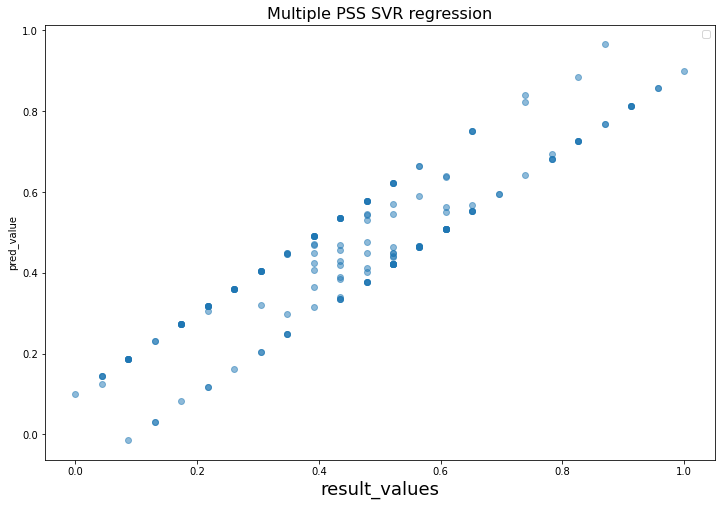

In [197]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plot_svm_regression(svm_regression, x_train, y)
plt.title("Multiple PSS SVR regression",fontsize=16)
plt.show()

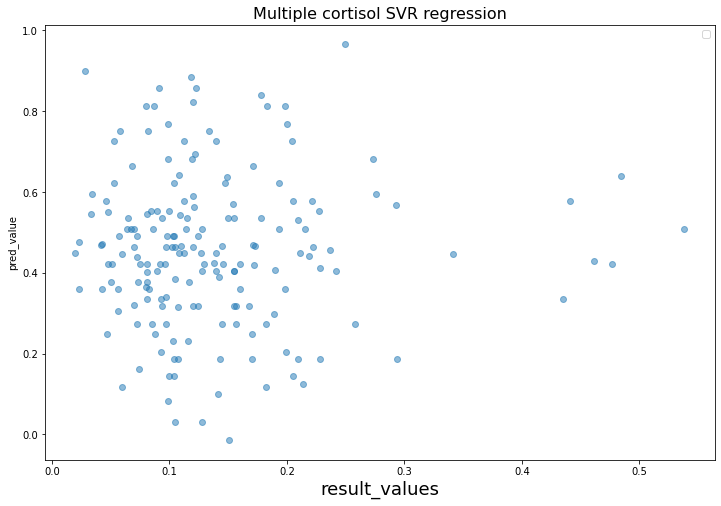

In [173]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plot_svm_regression(svm_regression, x_train, z)
plt.title("Multiple cortisol SVR regression",fontsize=16)
plt.show()

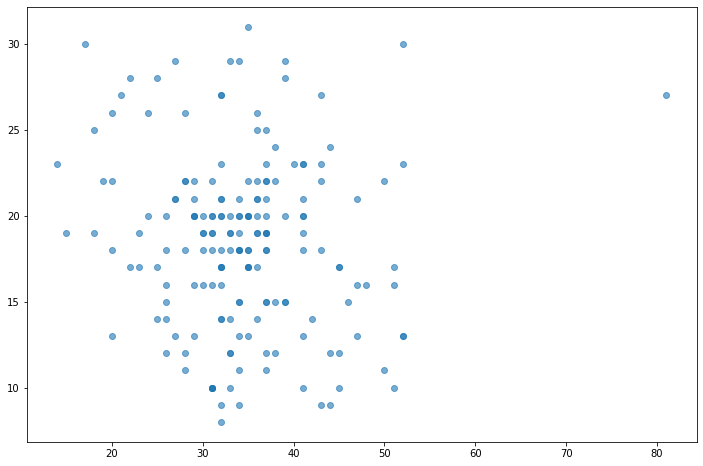

In [181]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.scatter(df[["심박변이"]],df[['PSS(지각된 스트레스 척도)']],alpha=0.6)
plt.show()

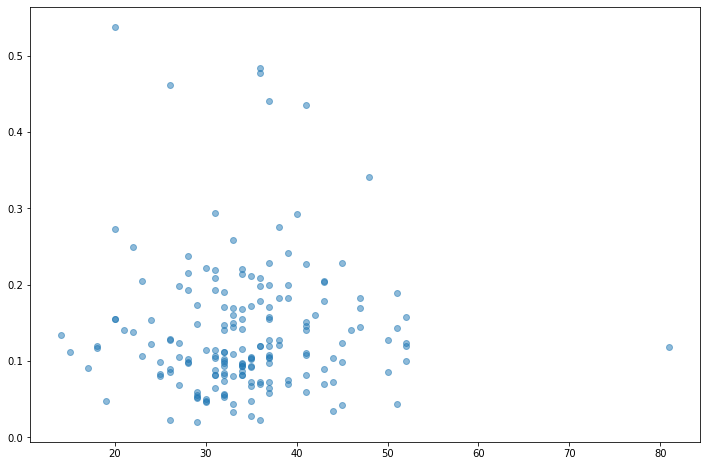

In [182]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.scatter(df[["심박변이"]],df[['코르티솔']],alpha=0.5)
plt.show()

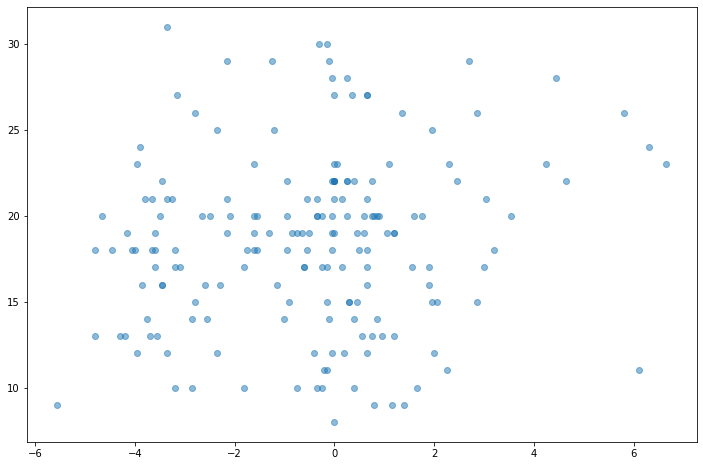

In [194]:
fig = plt.figure()
fig.set_size_inches(12,8)
plt.scatter(df[['3_P4_Alpha Peak_w (716)']],df[["PSS(지각된 스트레스 척도)"]],alpha=0.5)
plt.show()

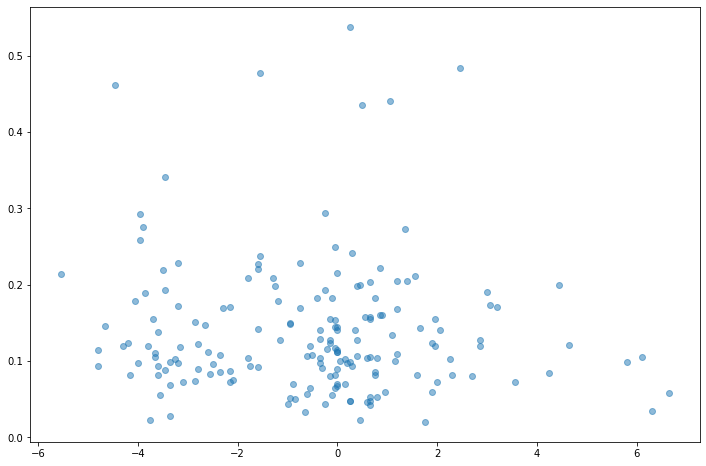

In [193]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.scatter(df[['3_P4_Alpha Peak_w (716)']],df[["코르티솔"]],alpha=0.5)
plt.show()

In [198]:
svm_regression.score(x_train, y)

0.8227199031127195

In [199]:
svm_regression.score(x_train, z)

-18.188913801521284